# PRODIGY INFOTECH

## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
accident_data = pd.read_csv(r"C:\Users\Mugdha dogra\Downloads\PRODIGY_DS_5-main\PRODIGY_DS_5-main\accidents.csv")
accident_data.head(4)

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions


In [5]:
print(accident_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB
None


In [6]:
print(accident_data.describe())

             Deaths
count  50000.000000
mean       4.983040
std        3.160581
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000


In [7]:
sns.set(style="darkgrid")

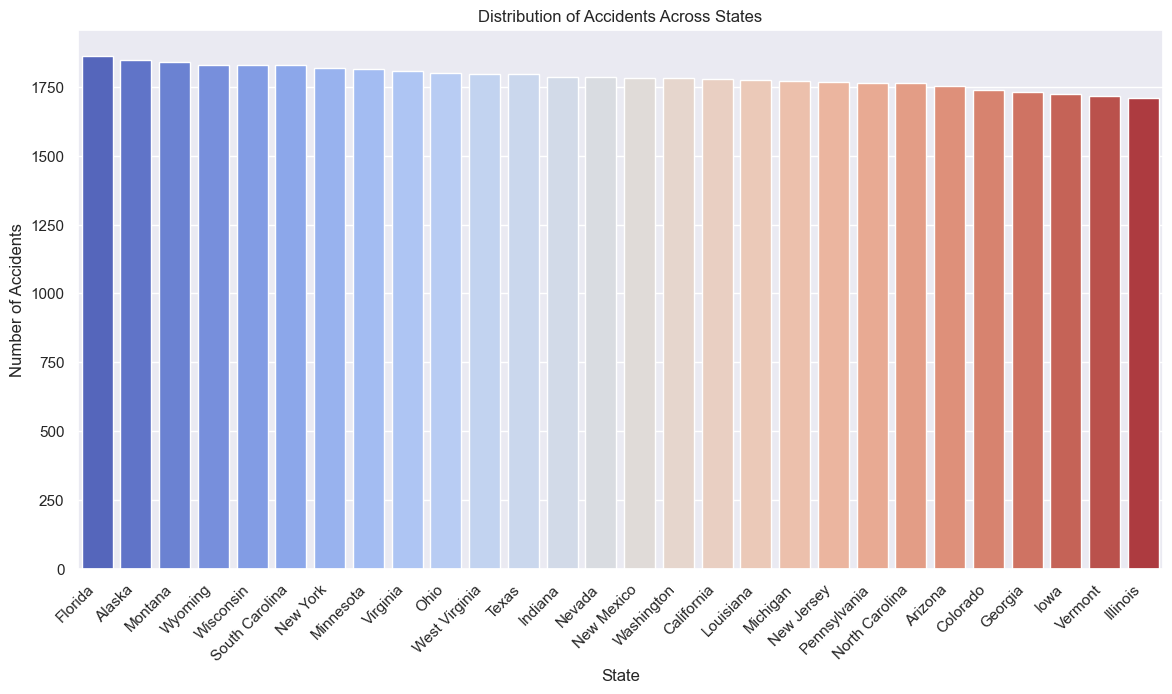

In [8]:
## Find accident distribution in different states
plt.figure(figsize=(14, 7))
sns.countplot(data=accident_data, x="State", order=accident_data['State'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Accidents Across States")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

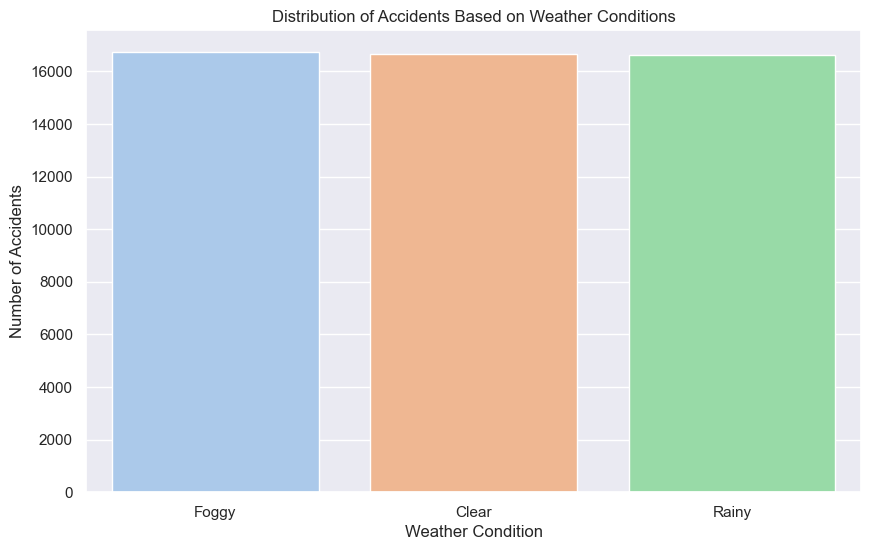

In [13]:
# Analyze accident distribution based on weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_data, x="WeatherCondition", order=accident_data['WeatherCondition'].value_counts().index, palette="pastel")
plt.title("Distribution of Accidents Based on Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

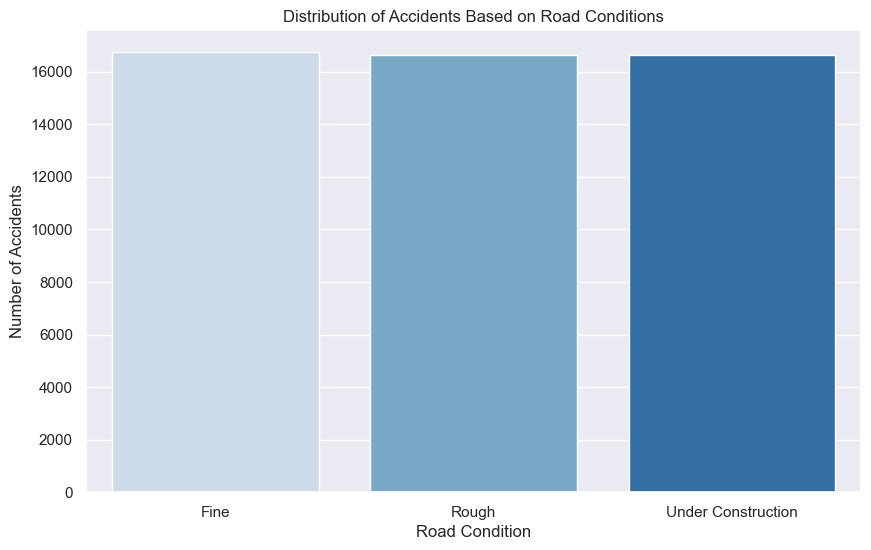

In [14]:
# Analyze accident distribution based on road conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_data, x="RoadCondition", order=accident_data['RoadCondition'].value_counts().index, palette="Blues")
plt.title("Distribution of Accidents Based on Road Conditions")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.show()

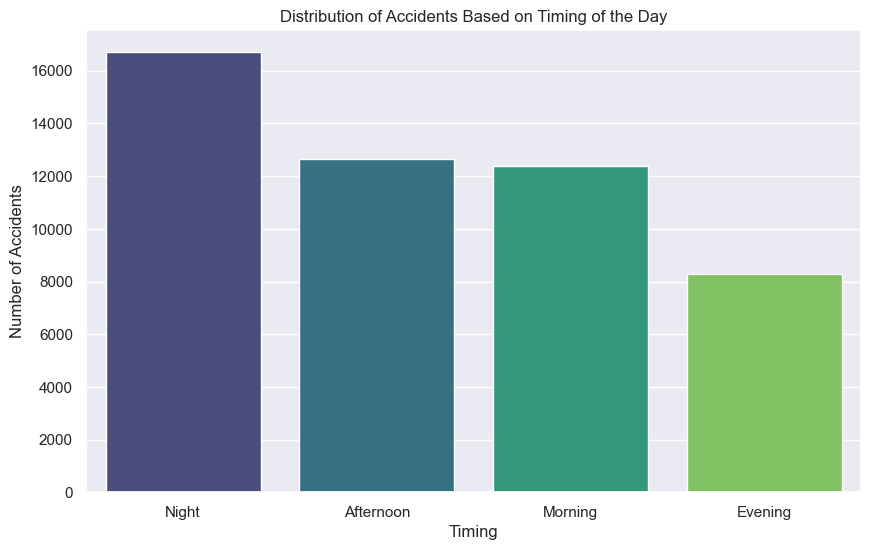

In [15]:
# Analyze accident distribution based on time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_data, x="Timing", order=accident_data['Timing'].value_counts().index, palette="viridis")
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.xlabel("Timing")
plt.ylabel("Number of Accidents")
plt.show()

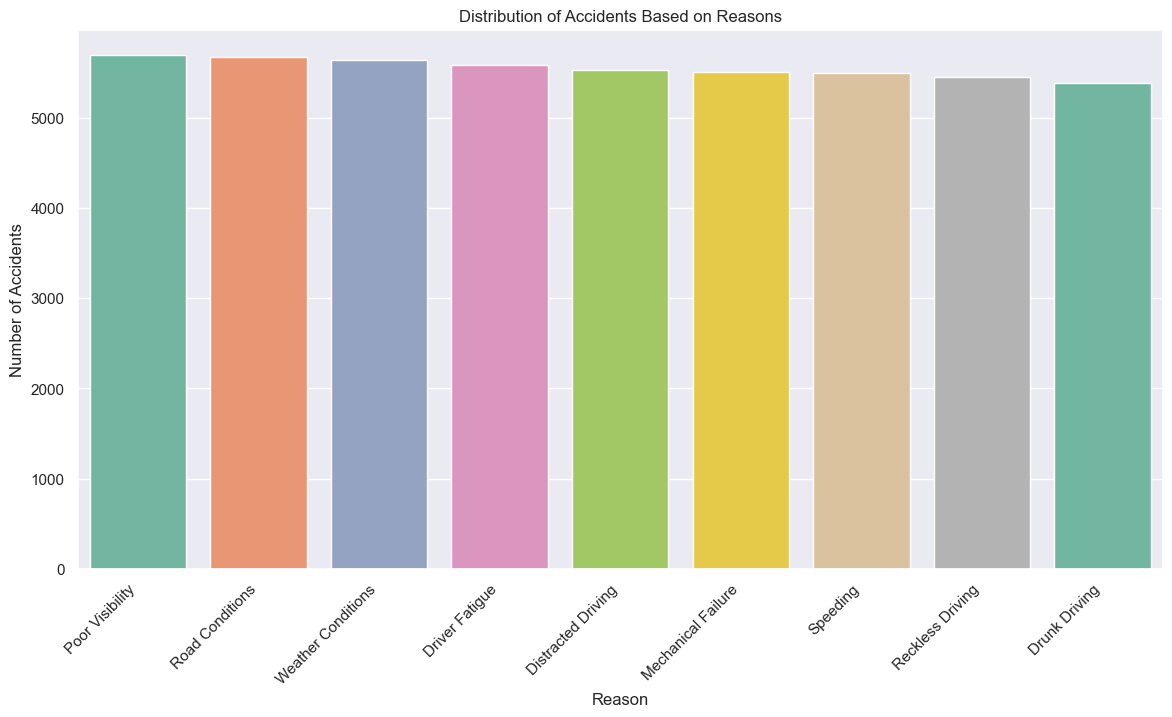

In [16]:
# Examine the reason for accidents
plt.figure(figsize=(14,7))
sns.countplot(data=accident_data, x="Reason", order = accident_data['Reason'].value_counts().index, palette='Set2')
plt.title("Distribution of Accidents Based on Reasons")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.show()

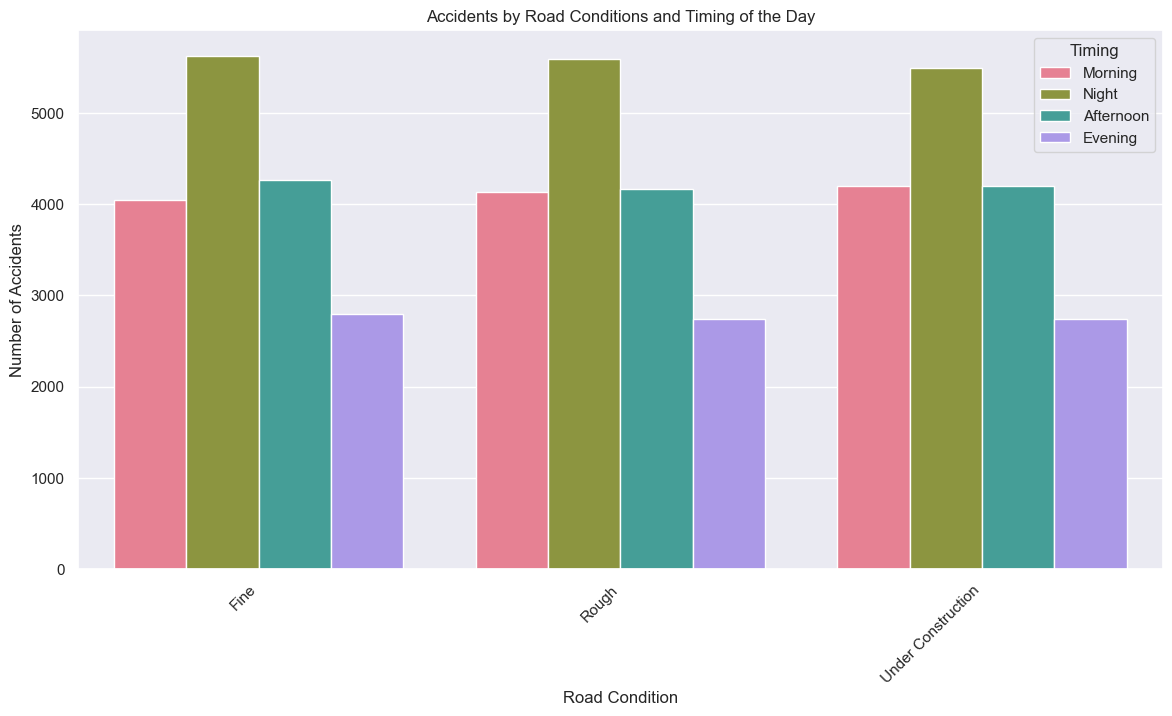

In [17]:
# Explore patterns related to road conditions and timing
plt.figure(figsize=(14, 7))
sns.countplot(data=accident_data, x="RoadCondition", hue="Timing", order=accident_data['RoadCondition'].value_counts().index, palette="husl")
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xlabel("Road Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()

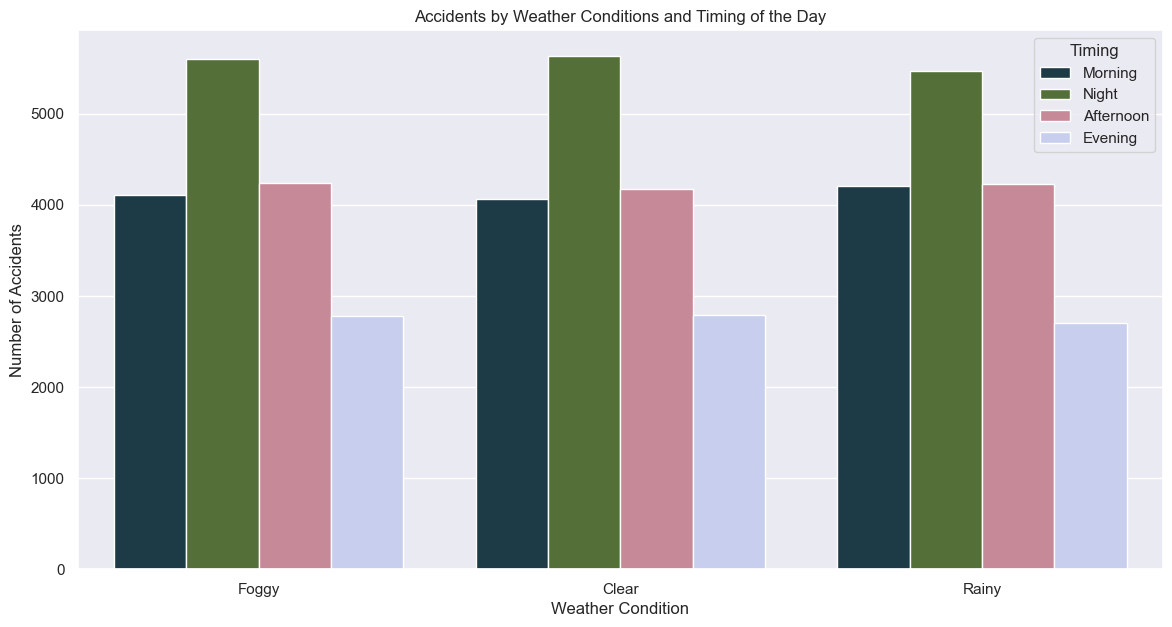

In [18]:
# Explore patterns related to weather conditions and timing
plt.figure(figsize=(14, 7))
sns.countplot(data=accident_data, x="WeatherCondition", hue="Timing", order=accident_data['WeatherCondition'].value_counts().index, palette="cubehelix")
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.legend(title="Timing")
plt.show()

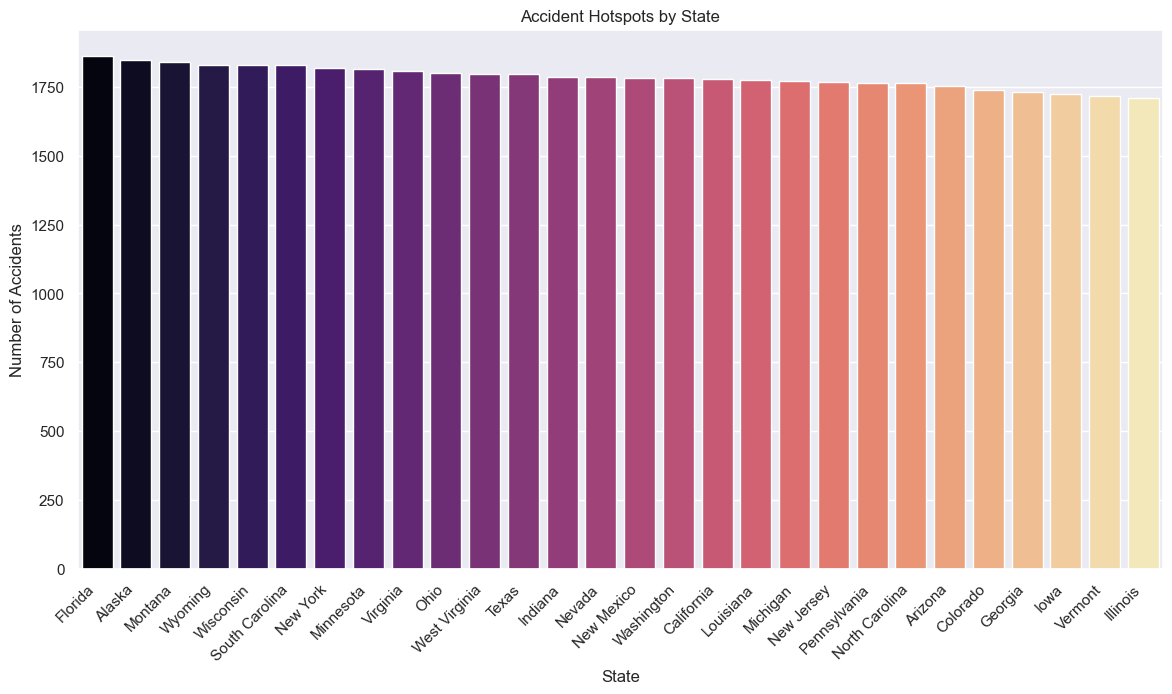

In [19]:
# Visualize accident hotspots (States with higher accident frequencies)
plt.figure(figsize=(14, 7))
state_accidents = accident_data['State'].value_counts()
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="magma")
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

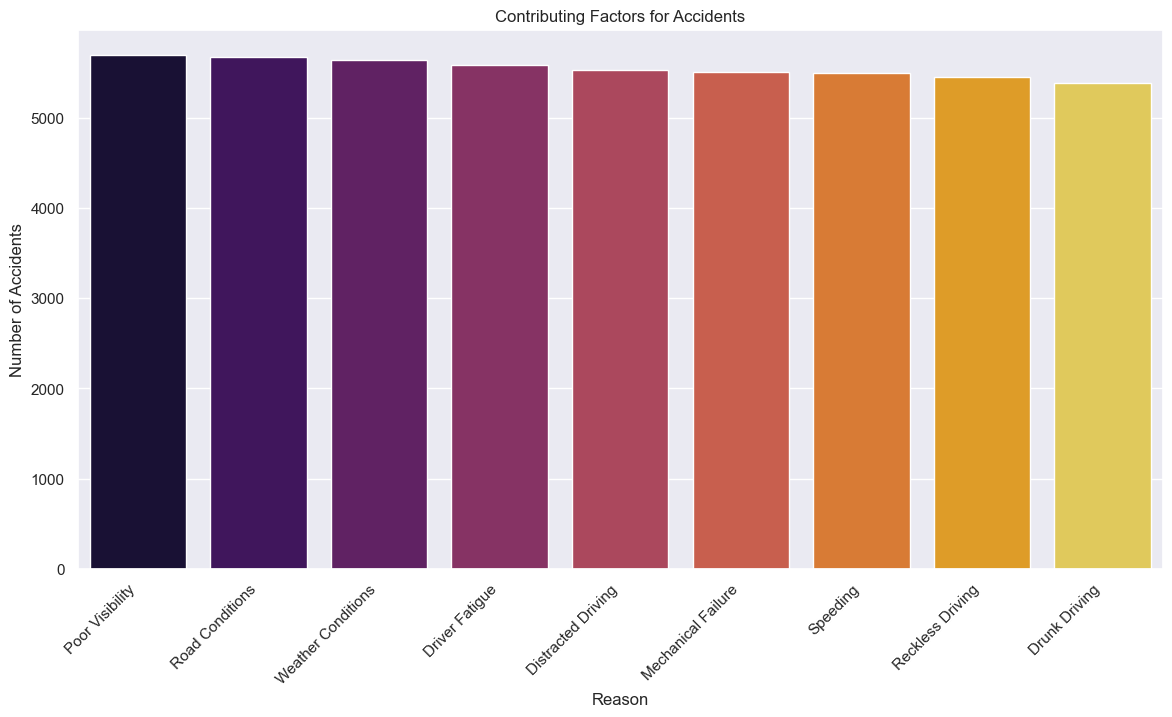

In [21]:
# Visualize contributing factors (Reasons for accidents)
plt.figure(figsize=(14, 7))
reasons_accidents = accident_data['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="inferno")
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()



<Figure size 1600x800 with 0 Axes>

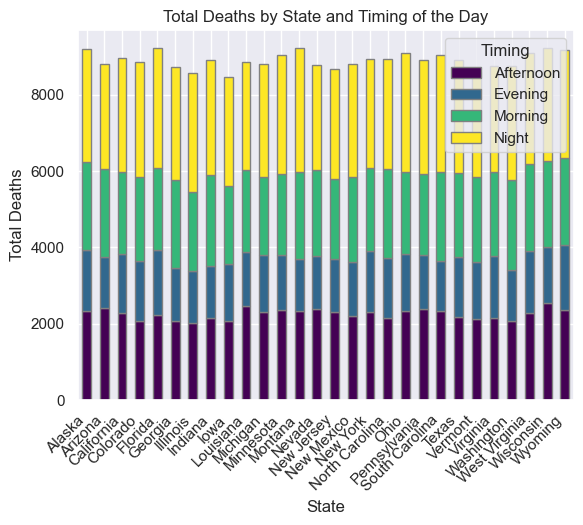

In [24]:
# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = accident_data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(16, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis", edgecolor='grey')
plt.title("Total Deaths by State and Timing of the Day")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()